In [50]:
#分别对临床资料和眼底进行K最近邻分析
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
#统计模型
import statsmodels.api as sm
#用来显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 
#导入数据
df = pd.read_excel('去除重复数据眼底和临床.xlsx',sheet_name="眼底和临床清洗")
# df2= pd.read_csv('finalScore.csv')
#祛除重复数据
df = df.drop_duplicates()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1478
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   病例号                   1451 non-null   object 
 1   age                   1418 non-null   float64
 2   gender                1418 non-null   float64
 3   吸烟状态（1从不吸烟2目前吸烟3已戒烟）  1418 non-null   float64
 4   饮酒（1从不饮酒2,目前饮酒3已戒酒）   1418 non-null   float64
 5   早发心血管病家族史（1是2否）       1451 non-null   int64  
 6   身高cm                  1286 non-null   float64
 7   体重kg                  1236 non-null   float64
 8   静息心率                  1300 non-null   float64
 9   收缩压                   1284 non-null   float64
 10  舒张压                   1284 non-null   float64
 11  高血压（0无1有）             1418 non-null   float64
 12  糖尿病（0无1有）             1418 non-null   float64
 13  总胆固醇                  1397 non-null   float64
 14  空腹血糖                  1398 non-null   float64
 15  Gensini              

In [52]:
#找出临床资料最相关的10个变量
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#以各列的均值填充NAN
df = df.fillna(df.mean())
x = sm.add_constant(df.iloc[:,1:-11]) #生成自变量
y = df['y'] #生成因变量
#特征选择
best_features = SelectKBest(score_func=f_regression,k=10)
fit = best_features.fit(x,y)
#输出结果
dfscores = pd.DataFrame(fit.scores_)
dfcollumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcollumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(10,'Score')) 

                 Feature         Score
15               Gensini  98204.145911
2                 gender     95.776561
16               *肌酐(酶法)     67.201670
3   吸烟状态（1从不吸烟2目前吸烟3已戒烟）     57.395172
13                  总胆固醇     44.532424
14                  空腹血糖     29.964587
7                   体重kg     23.011957
6                   身高cm     20.203199
4    饮酒（1从不饮酒2,目前饮酒3已戒酒）      9.142780
1                    age      5.116095


C:\Users\count\AppData\Local\Temp\ipykernel_4492\526893051.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [53]:
#进行多元线性回归需要满足LINK：线性（Linear）、正态性（Normal）、独立性（independence）、方差齐性（Equal Variance），俗称LINE，是线性回归分析的四大基本前提条件。
# 所以如果变量不存在线性关系，则不能进行线性回归
# #采用性别、肌酐、总胆固醇、空腹血糖、年龄进行多元线性回归
# df1 = df[['*肌酐(酶法)','gender','总胆固醇','空腹血糖','age','y']]
# df1.info()
# x = sm.add_constant(df1.iloc[:,1:-2]) #生成自变量
# y = df1['y'] #生成因变量
# model = sm.OLS(y, x) #生成模型
# result = model.fit() #模型拟合
# result.summary() #模型描述

In [54]:
#判断各指标是否存在线性关系，采用Pearson
df1 = df[['*肌酐(酶法)','gender','总胆固醇','空腹血糖','age','y']]
df1 = df1.drop_duplicates()
df1.info()
print(df1.corr(method='spearman'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1478
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   *肌酐(酶法)  1420 non-null   float64
 1   gender   1420 non-null   float64
 2   总胆固醇     1420 non-null   float64
 3   空腹血糖     1420 non-null   float64
 4   age      1420 non-null   float64
 5   y        1420 non-null   float64
dtypes: float64(6)
memory usage: 77.7 KB
          *肌酐(酶法)    gender      总胆固醇      空腹血糖       age         y
*肌酐(酶法)  1.000000 -0.541907 -0.211860 -0.029287  0.027388  0.230177
gender  -0.541907  1.000000  0.296064  0.001664  0.155680 -0.289773
总胆固醇    -0.211860  0.296064  1.000000 -0.020910 -0.009141 -0.268902
空腹血糖    -0.029287  0.001664 -0.020910  1.000000  0.064343  0.156564
age      0.027388  0.155680 -0.009141  0.064343  1.000000  0.127729
y        0.230177 -0.289773 -0.268902  0.156564  0.127729  1.000000


In [55]:
#判断眼底指标是否存在线性关系，采用Pearson
df2 = df[['颞上动静脉管径比','颞上CRAE','颞上CRVE','动脉分形维数','静脉分形维数','动脉弯曲度','静脉弯曲度','y']]
df2 = df2.drop_duplicates()
df2.info()
print(df2.corr(method='spearman'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1478
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   颞上动静脉管径比  1420 non-null   float64
 1   颞上CRAE    1420 non-null   float64
 2   颞上CRVE    1420 non-null   float64
 3   动脉分形维数    1420 non-null   float64
 4   静脉分形维数    1420 non-null   float64
 5   动脉弯曲度     1420 non-null   float64
 6   静脉弯曲度     1420 non-null   float64
 7   y         1420 non-null   float64
dtypes: float64(8)
memory usage: 99.8 KB
          颞上动静脉管径比    颞上CRAE    颞上CRVE    动脉分形维数    静脉分形维数     动脉弯曲度  \
颞上动静脉管径比  1.000000  0.446289 -0.312578  0.052104 -0.008339  0.079386   
颞上CRAE    0.446289  1.000000  0.621564  0.278182  0.235824  0.179326   
颞上CRVE   -0.312578  0.621564  1.000000  0.302600  0.312690  0.174268   
动脉分形维数    0.052104  0.278182  0.302600  1.000000  0.922496  0.464283   
静脉分形维数   -0.008339  0.235824  0.312690  0.922496  1.000000  0.461882   
动脉弯曲度     0.079386  0.179326  0

In [56]:
#用眼底指标进行逻辑回归
#将gesini连续数据离散化（二值化）小于4为0，大于等于4为1
from sklearn.preprocessing import Binarizer
# help(Binarizer)
# reshape(-1,1)的意思是 请帮我将数据规整为任意行（-1)，1列,这是对列进行增维，类为特征专用，不能使用一维数据
df2_0 = df2.iloc[:,-1].values.reshape(-1,1)
print(df2_0)
print(df2.iloc[:,-1].values)
binarizer = Binarizer(threshold = 4).fit_transform(df2_0)#thresold阈值
df2.loc[:,"y"] = binarizer
df2

[[ 0.]
 [ 0.]
 [ 8.]
 ...
 [ 0.]
 [14.]
 [28.]]
[ 0.  0.  8. ...  0. 14. 28.]


,颞上动静脉管径比,颞上CRAE,颞上CRVE,动脉分形维数,静脉分形维数,动脉弯曲度,静脉弯曲度,y
0,0.7045,73.0,103.5,1.6655,1.6710,1.16870,1.81780,0.0
1,0.5775,61.5,106.5,1.6005,1.6250,1.24230,2.92250,0.0
2,0.6415,59.5,94.5,1.5650,1.5775,1.06225,1.74815,1.0
3,0.7505,59.5,80.0,1.5490,1.5670,0.83105,1.55755,1.0
4,0.6920,67.5,99.0,1.6235,1.7070,0.76940,1.66480,1.0
...,...,...,...,...,...,...,...,...
1474,0.8190,69.5,85.0,1.4720,1.4975,0.65030,1.92155,0.0
1475,0.6230,51.0,83.5,1.5840,1.6125,1.27550,1.73215,0.0
1476,0.6855,50.5,76.0,1.6250,1.6430,0.95030,1.20190,0.0
1477,0.5845,68.0,117.0,1.3835,1.5410,1.53025,2.23965,1.0


In [57]:
# 需要自行添加逻辑回归所需的intercept变量
# df2['intercept'] = 1.0
#划分特征变量和目标变量
x = df2.drop(columns="y")
y = df2["y"]
#拆分数据。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
#模型搭建
from sklearn.linear_model import LogisticRegression
mode1 = LogisticRegression()
mode1.fit(X_train,y_train)
mode1
y_pred = mode1.predict(X_test)
y_pred[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [58]:
#查看准确性
from sklearn.metrics import roc_auc_score,accuracy_score, confusion_matrix
score = accuracy_score(y_pred,y_test)
score

0.5809859154929577

In [59]:
#混淆矩阵的Python代码实现
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test,y_pred)
# m
a = pd.DataFrame(m, index =["0实际小于4","1实际大于4"],columns= ["预测小于4","预测大于4"])
a

,预测小于4,预测大于4
0实际小于4,0,119
1实际大于4,0,165


0.663203463203463

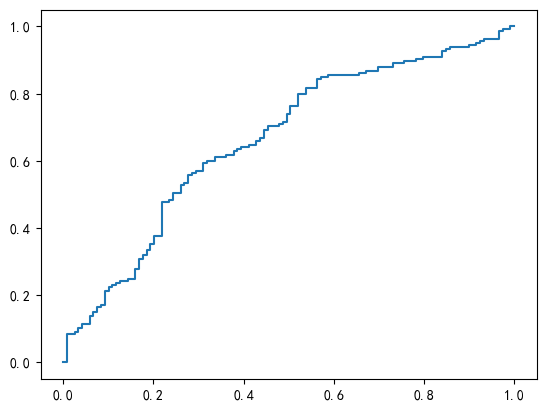

In [60]:
#用ROC曲线评估
from sklearn.metrics import roc_curve
#预测概率
y_pred_proba = mode1.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
#绘制ROC曲线
plt.plot(fpr,tpr)
plt.show
#AUC值
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

In [61]:
#用临床指标进行逻辑回归
#将gesini连续数据离散化（二值化）小于4为0，大于等于4为1
from sklearn.preprocessing import Binarizer
# help(Binarizer)
# reshape(-1,1)的意思是 请帮我将数据规整为任意行（-1)，1列,这是对列进行增维，类为特征专用，不能使用一维数据
df1_0 = df1.iloc[:,-1].values.reshape(-1,1)
print(df1_0)
print(df1.iloc[:,-1].values)
binarizer = Binarizer(threshold = 4).fit_transform(df1_0)#thresold阈值
df1.loc[:,"y"] = binarizer
df1

[[ 0.]
 [ 0.]
 [ 8.]
 ...
 [ 0.]
 [14.]
 [28.]]
[ 0.  0.  8. ...  0. 14. 28.]


,*肌酐(酶法),gender,总胆固醇,空腹血糖,age,y
0,65.0,1.0,8.48,5.4,39.0,0.0
1,56.0,2.0,3.70,5.9,59.0,0.0
2,91.0,1.0,3.18,5.9,71.0,1.0
3,60.0,1.0,5.40,6.9,69.0,1.0
4,70.0,1.0,3.88,7.7,51.0,1.0
...,...,...,...,...,...,...
1474,61.0,2.0,5.65,5.2,68.0,0.0
1475,71.0,2.0,5.74,4.8,58.0,0.0
1476,69.0,1.0,5.27,4.6,49.0,0.0
1477,65.0,2.0,3.88,6.1,68.0,1.0


In [62]:
df1['y']

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1474    0.0
1475    0.0
1476    0.0
1477    1.0
1478    1.0
Name: y, Length: 1420, dtype: float64

In [63]:
# 需要自行添加逻辑回归所需的intercept变量
# df2['intercept'] = 1.0
#划分特征变量和目标变量
x = df1.drop(columns="y")
y = df1["y"]
#拆分数据。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
#模型搭建
from sklearn.linear_model import LogisticRegression
mode1 = LogisticRegression()
mode1.fit(X_train,y_train)
mode1
y_pred = mode1.predict(X_test)
y_pred[0:10]

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

In [64]:
#查看准确性
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.676056338028169

In [65]:
#混淆矩阵的Python代码实现
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test,y_pred)
# m
a = pd.DataFrame(m, index =["0实际小于4","1实际大于4"],columns= ["预测小于4","预测大于4"])
a

,预测小于4,预测大于4
0实际小于4,42,74
1实际大于4,18,150


0.6952996715927751

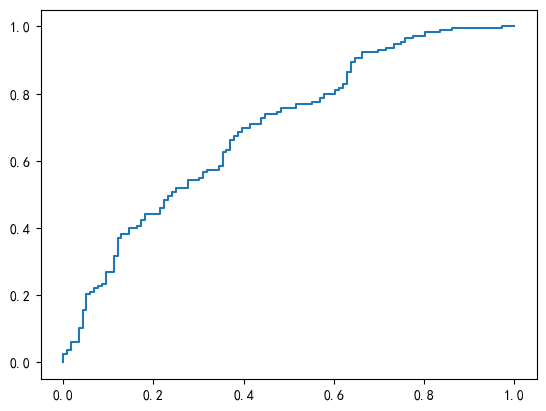

In [66]:
#用ROC曲线评估
from sklearn.metrics import roc_curve
#预测概率
y_pred_proba = mode1.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
#绘制ROC曲线
plt.plot(fpr,tpr)
plt.show
#AUC值
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

In [67]:
#临床指标联合眼底指标
df3 = df[['*肌酐(酶法)','gender','总胆固醇','空腹血糖','age','颞上动静脉管径比','颞上CRAE','颞上CRVE','动脉分形维数','静脉分形维数','动脉弯曲度','静脉弯曲度','y']]
df3 = df3.drop_duplicates()
df3

,*肌酐(酶法),gender,总胆固醇,空腹血糖,age,颞上动静脉管径比,颞上CRAE,颞上CRVE,动脉分形维数,静脉分形维数,动脉弯曲度,静脉弯曲度,y
0,65.0,1.0,8.48,5.4,39.0,0.7045,73.0,103.5,1.6655,1.6710,1.16870,1.81780,0.0
1,56.0,2.0,3.70,5.9,59.0,0.5775,61.5,106.5,1.6005,1.6250,1.24230,2.92250,0.0
2,91.0,1.0,3.18,5.9,71.0,0.6415,59.5,94.5,1.5650,1.5775,1.06225,1.74815,8.0
3,60.0,1.0,5.40,6.9,69.0,0.7505,59.5,80.0,1.5490,1.5670,0.83105,1.55755,50.0
4,70.0,1.0,3.88,7.7,51.0,0.6920,67.5,99.0,1.6235,1.7070,0.76940,1.66480,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,61.0,2.0,5.65,5.2,68.0,0.8190,69.5,85.0,1.4720,1.4975,0.65030,1.92155,0.0
1475,71.0,2.0,5.74,4.8,58.0,0.6230,51.0,83.5,1.5840,1.6125,1.27550,1.73215,0.0
1476,69.0,1.0,5.27,4.6,49.0,0.6855,50.5,76.0,1.6250,1.6430,0.95030,1.20190,0.0
1477,65.0,2.0,3.88,6.1,68.0,0.5845,68.0,117.0,1.3835,1.5410,1.53025,2.23965,14.0


In [68]:
#用眼底指标进行逻辑回归
#将gesini连续数据离散化（二值化）小于4为0，大于等于4为1
from sklearn.preprocessing import Binarizer
# help(Binarizer)
# reshape(-1,1)的意思是 请帮我将数据规整为任意行（-1)，1列,这是对列进行增维，类为特征专用，不能使用一维数据
df3_0 = df3.iloc[:,-1].values.reshape(-1,1)
print(df3_0)
print(df3.iloc[:,-1].values)
binarizer = Binarizer(threshold = 4).fit_transform(df3_0)#thresold阈值
df3.loc[:,"y"] = binarizer
df3

[[ 0.]
 [ 0.]
 [ 8.]
 ...
 [ 0.]
 [14.]
 [28.]]
[ 0.  0.  8. ...  0. 14. 28.]


,*肌酐(酶法),gender,总胆固醇,空腹血糖,age,颞上动静脉管径比,颞上CRAE,颞上CRVE,动脉分形维数,静脉分形维数,动脉弯曲度,静脉弯曲度,y
0,65.0,1.0,8.48,5.4,39.0,0.7045,73.0,103.5,1.6655,1.6710,1.16870,1.81780,0.0
1,56.0,2.0,3.70,5.9,59.0,0.5775,61.5,106.5,1.6005,1.6250,1.24230,2.92250,0.0
2,91.0,1.0,3.18,5.9,71.0,0.6415,59.5,94.5,1.5650,1.5775,1.06225,1.74815,1.0
3,60.0,1.0,5.40,6.9,69.0,0.7505,59.5,80.0,1.5490,1.5670,0.83105,1.55755,1.0
4,70.0,1.0,3.88,7.7,51.0,0.6920,67.5,99.0,1.6235,1.7070,0.76940,1.66480,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,61.0,2.0,5.65,5.2,68.0,0.8190,69.5,85.0,1.4720,1.4975,0.65030,1.92155,0.0
1475,71.0,2.0,5.74,4.8,58.0,0.6230,51.0,83.5,1.5840,1.6125,1.27550,1.73215,0.0
1476,69.0,1.0,5.27,4.6,49.0,0.6855,50.5,76.0,1.6250,1.6430,0.95030,1.20190,0.0
1477,65.0,2.0,3.88,6.1,68.0,0.5845,68.0,117.0,1.3835,1.5410,1.53025,2.23965,1.0


In [69]:
# 需要自行添加逻辑回归所需的intercept变量
# df2['intercept'] = 1.0
#划分特征变量和目标变量
x = df3.drop(columns="y")
y = df3["y"]
#拆分数据。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
#模型搭建
from sklearn.linear_model import LogisticRegression
mode1 = LogisticRegression()
mode1.fit(X_train,y_train)
mode1
y_pred = mode1.predict(X_test)
y_pred[0:10]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

0.6968447204968944

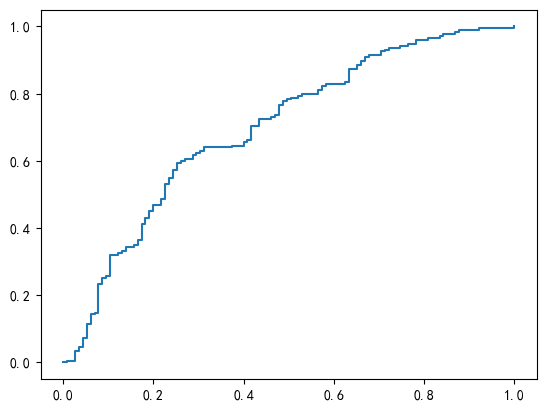

In [70]:
#用ROC曲线评估
from sklearn.metrics import roc_curve
#预测概率
y_pred_proba = mode1.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
#绘制ROC曲线
plt.plot(fpr,tpr)
plt.show
#AUC值
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])

In [71]:
#只用一个眼科指标建模 和 用所有眼科建模 比较 RCI
df4 = df[['*肌酐(酶法)','gender','总胆固醇','空腹血糖','age','颞上动静脉管径比','动脉弯曲度','动脉分形维数','y']]
df4 = df4.drop_duplicates()
df4

,*肌酐(酶法),gender,总胆固醇,空腹血糖,age,颞上动静脉管径比,动脉弯曲度,动脉分形维数,y
0,65.0,1.0,8.48,5.4,39.0,0.7045,1.16870,1.6655,0.0
1,56.0,2.0,3.70,5.9,59.0,0.5775,1.24230,1.6005,0.0
2,91.0,1.0,3.18,5.9,71.0,0.6415,1.06225,1.5650,8.0
3,60.0,1.0,5.40,6.9,69.0,0.7505,0.83105,1.5490,50.0
4,70.0,1.0,3.88,7.7,51.0,0.6920,0.76940,1.6235,60.0
...,...,...,...,...,...,...,...,...,...
1474,61.0,2.0,5.65,5.2,68.0,0.8190,0.65030,1.4720,0.0
1475,71.0,2.0,5.74,4.8,58.0,0.6230,1.27550,1.5840,0.0
1476,69.0,1.0,5.27,4.6,49.0,0.6855,0.95030,1.6250,0.0
1477,65.0,2.0,3.88,6.1,68.0,0.5845,1.53025,1.3835,14.0


In [72]:
#将gesini连续数据离散化（二值化）小于4为0，大于等于4为1
from sklearn.preprocessing import Binarizer
# help(Binarizer)
# reshape(-1,1)的意思是 请帮我将数据规整为任意行（-1)，1列,这是对列进行增维，类为特征专用，不能使用一维数据
df4_0 = df4.iloc[:,-1].values.reshape(-1,1)
print(df4_0)
print(df4.iloc[:,-1].values)
binarizer = Binarizer(threshold = 4).fit_transform(df4_0)#thresold阈值
df4.loc[:,"y"] = binarizer
df4
# 需要自行添加逻辑回归所需的intercept变量
# df2['intercept'] = 1.0
#划分特征变量和目标变量
x = df4.drop(columns="y")
y = df4["y"]
#拆分数据。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8)
#模型搭建
from sklearn.linear_model import LogisticRegression
mode1 = LogisticRegression()
mode1.fit(X_train,y_train)
mode1
y_pred = mode1.predict(X_test)
y_pred[0:10]

[[ 0.]
 [ 0.]
 [ 8.]
 ...
 [ 0.]
 [14.]
 [28.]]
[ 0.  0.  8. ...  0. 14. 28.]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1., 1., 0., 1., 1., 1., 0., 1., 1., 1.])

0.702807453416149

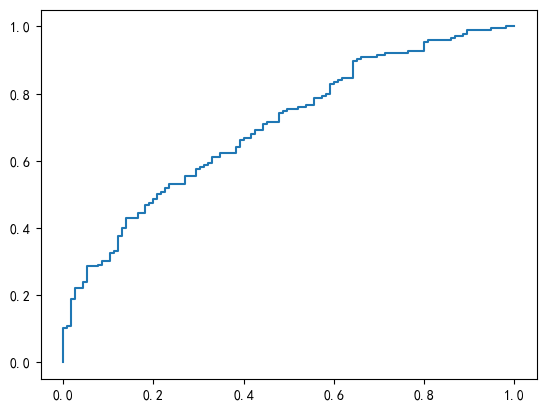

In [73]:
#用ROC曲线评估
from sklearn.metrics import roc_curve
#预测概率
y_pred_proba = mode1.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
#绘制ROC曲线
plt.plot(fpr,tpr)
plt.show
#AUC值
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba[:,1])